In [19]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

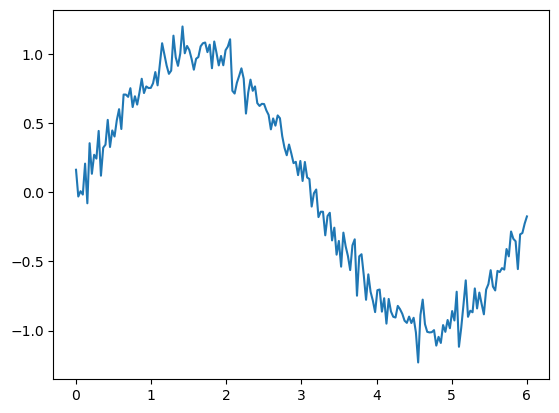

In [20]:
n = 200
np.random.seed(1)
X = np.linspace(0, 6, n).reshape(n,1)
y = np.sin(X) + 0.1*np.random.randn(*X.shape)
plt.plot(X, y)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

train_data_linear = lgb.Dataset(X_train, label=y_train,
                        params={
                            'linear_tree': True
                        })

train_data_normal = lgb.Dataset(X_train, label=y_train)

In [22]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 30,
    "learning_rate": 0.1,
    "verbosity": -1
}

model_linear = lgb.train(params, train_data_linear)
model_normal = lgb.train(params, train_data_normal)

c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


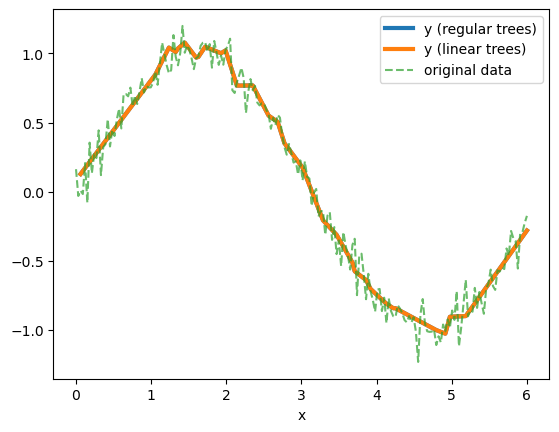

In [23]:
y_pred_linear = model_linear.predict(X_test, num_iteration=model_linear.best_iteration)
y_pred_normal = model_normal.predict(X_test, num_iteration=model_normal.best_iteration)
# plotting results
df = pd.DataFrame(X_test, columns=['x'])
df['y (regular trees)'] = y_pred_normal
df['y (linear trees)'] = y_pred_linear
df.sort_values('x').set_index('x').plot(lw=3)
plt.plot(X, y, label='original data', alpha=0.7, linestyle='--')
plt.legend()
plt.show()

In [24]:
print(model_linear.params)

{'objective': 'regression', 'metric': 'rmse', 'num_leaves': 30, 'learning_rate': 1, 'verbosity': -1, 'linear_tree': True, 'num_iterations': 100, 'early_stopping_round': None}


In [25]:
from sklearn.metrics import mean_squared_error
print(f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
print(f"Normal trees error: {round(mean_squared_error(y_test, y_pred_normal),3)}")

Linear trees error: 0.011
Normal trees error: 0.011


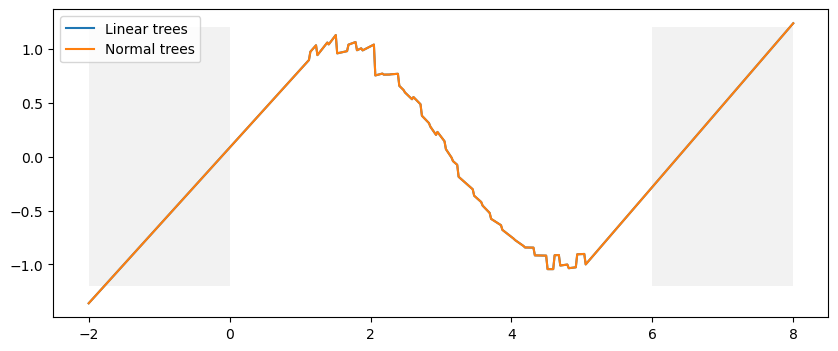

In [26]:
X_extrapol = np.linspace(-2, 8, 500)
X_extrapol = X_extrapol.reshape(X_extrapol.shape[0],1)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(X_extrapol, model_linear.predict(X_extrapol, num_iteration=model_linear.best_iteration), label='Linear trees')
ax.plot(X_extrapol, model_normal.predict(X_extrapol, num_iteration=model_normal.best_iteration), label='Normal trees')
ax.legend()

ax.fill_between(np.linspace(-2,0), -1.2, 1.2, facecolor='gray', alpha=0.1)
ax.fill_between(np.linspace(6,8), -1.2, 1.2, facecolor='gray', alpha=0.1)

plt.show()

<AxesSubplot: >

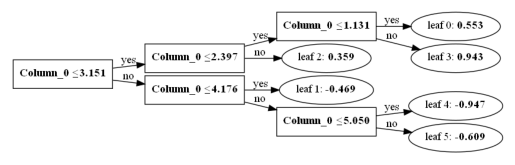

In [27]:
# extra step to allow graphviz to be found 
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'
lgb.plot_tree(model_linear)